### Initial setup

In [ ]:
#install gradio for GUI
!pip install gradio

`#|default_exp app` is marked for nbdev to convert code cells which are markded with `#|export` to `.py` file.

In [2]:
#|default_exp app

In [ ]:
#|export
from fastai.vision.all import *
import gradio as gr

Upload example.jpg to **Files** section of google colab

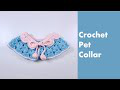

In [ ]:
im = PILImage.create('example.jpg')
im

### Use trained model

In [ ]:
#|export
learn = load_learner('model.pkl')

In [ ]:
learn.predict(im)

('above_average', tensor(0), tensor([0.5759, 0.4241]))

In [ ]:
#|export
categories = ('Above Average', 'Below Average')

def classify_image(img):
  pred,idx,probs = learn.predict(img)
  return dict(zip(categories, map(float,probs)))

In [ ]:
classify_image(im)

{'Above Average': 0.575865626335144, 'Below Average': 0.42413434386253357}

### Lauch Gradio app

In [ ]:
#|export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['example.jpg', 'above_average.jpg', 'below_average.jpg']
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False,share=True)

<ipython-input-22-ad0da62d8b7b>:2: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(192,192))
<ipython-input-22-ad0da62d8b7b>:2: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(192,192))
<ipython-input-22-ad0da62d8b7b>:3: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label()
<ipython-input-22-ad0da62d8b7b>:3: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://08ffbbcc32701578cd.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Export notebook cells marked with `#|export` to python script

In [ ]:
!pip install nbdev

### Export to google drive

Because I run this notebook in colab, I set up following code to save all files from colab session including exporting app.py from this notebook to a folder in my google drive. So I can download and upload to Hugging Face repo later.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import shutil

# Specify the source path (current Colab folder)
source_folder = '/content'

# Specify the destination path (Google Drive folder)
destination_folder = '/content/gdrive/My Drive/fastai/Lesson2/'

# Copy only files in the source folder (exclude subfolders)
for file_name in os.listdir(source_folder):
    file_path = os.path.join(source_folder, file_name)
    if os.path.isfile(file_path):
        shutil.copy(file_path, destination_folder)


In [ ]:
path = '/content/gdrive/My Drive/Colab Notebooks/' #default path where colad saves notebooks to your google drive
shutil.copy2(path+'app.ipynb', destination_folder) #change app.ipynb to the name of your colab notebook

'/content/gdrive/My Drive/fastai/Lesson2/app.ipynb'

In [ ]:
import nbdev
nbdev.export.nb_export(destination_folder+'app.ipynb', destination_folder) #change app.ipynb to the name of your colab notebook
print('Export successful')

Export successful
